# Olist's Metric Design 

In this challenge, we are going to catch a first glimpse into `Olist's business health`

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from olist.data import Olist
data = Olist().get_data()

## Test your import!

In [3]:
from nbresult import ChallengeResult

result = ChallengeResult('orders',
    keys_len=len(data),
    key_names=sorted(list(data.keys())),
    reviews_number=len(data['order_reviews'])
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/abellan/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/abellan/code/Juan-Abellan/W3_Decision_Science/W3.1_Project_Setup/Metric_Design/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 3 items

test_orders.py::TestOrders::test_key_names PASSED                        [ 33%]
test_orders.py::TestOrders::test_keys_len PASSED                         [ 66%]
test_orders.py::TestOrders::test_reviews_number PASSED                   [100%]

============================== 3 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/orders.pickle

git commit -m 'Completed orders step'

git push origin master



## 1 - Orders vs. Reviews?

❓Plot a histogram of `review_score`. 

In [4]:
print(f"""
{type(data) = }
...............................................................................................................................
{data.keys() = }
...............................................................................................................................
{type(data['order_reviews'].columns) = }
{data['order_reviews'].columns = }
{data['order_reviews'].columns[2] = }
...............................................................................................................................
{data['order_reviews'][data['order_reviews'].columns[2]]}
""")


type(data) = <class 'dict'>
...............................................................................................................................
data.keys() = dict_keys(['sellers', 'order_reviews', 'order_items', 'customers', 'orders', 'order_payments', 'product_category_name_translation', 'products', 'geolocation'])
...............................................................................................................................
type(data['order_reviews'].columns) = <class 'pandas.core.indexes.base.Index'>
data['order_reviews'].columns = Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
data['order_reviews'].columns[2] = 'review_score'
...............................................................................................................................
0        4
1        5
2        5
3        5
4        5
        ..


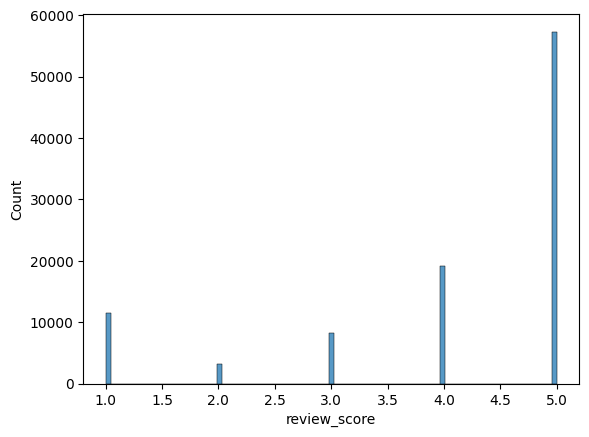

In [5]:
sns.histplot(data=data['order_reviews'][data['order_reviews'].columns[2]]);

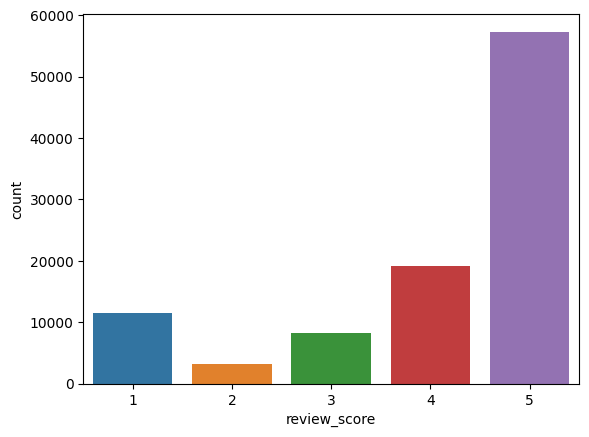

In [6]:
sns.countplot(x='review_score', data=data['order_reviews']);

❓ Plot a histogram of `order_status` <br/>

<AxesSubplot:xlabel='order_status', ylabel='count'>

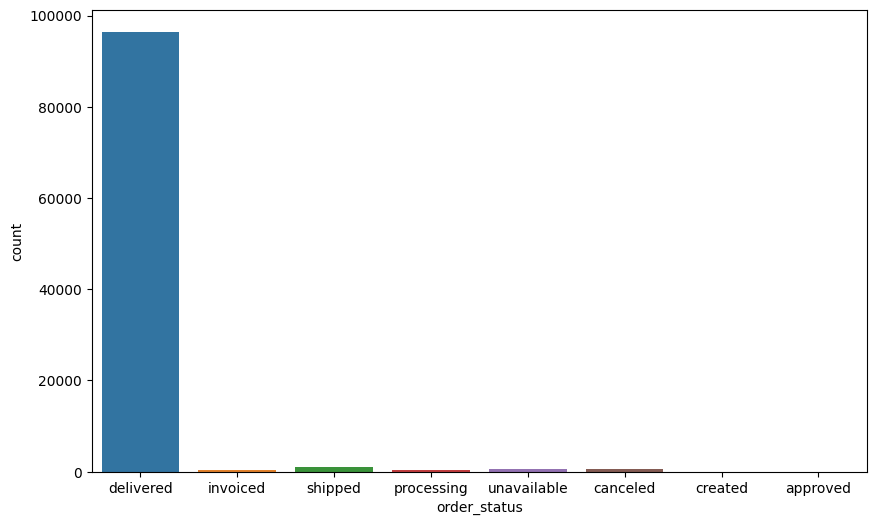

In [7]:
plt.figure(figsize = (10,6))
sns.countplot(data = data['orders'], x = 'order_status')

❓ How many of them are delivered ? shipped ? canceled ? ...

In [8]:
data['orders']['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

💡 We already know - from our data schema - that each `review` has a unique `order`.

🤔 Do all `orders` have a `review`?

<details>
    <summary><i>▸ Hint</i></summary>

You can use `pd.Series.isna().sum()` to count the number of NaN values in a series
</details>

In [9]:
# orders_reviews = data['orders'].merge(data['order_reviews'], on='order_id', how='left')
# orders_reviews[['order_id','review_score']].isna().sum()
orders_reviews = data['orders'].merge(data['order_reviews'], on='order_id', how='left')
print(f"""
{display(orders_reviews.head(3)) = }
---------------------------------------------------------------------------------------------------------------------------
{orders_reviews.info()}
...............................................................................................................................
{display(orders_reviews[['order_id','review_score']])}
{orders_reviews[['order_id','review_score']].info()}
{orders_reviews[['order_id','review_score']].isna().sum()}
""")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99991
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99992 non-null  object 
 1   customer_id                    99992 non-null  object 
 2   order_status                   99992 non-null  object 
 3   order_purchase_timestamp       99992 non-null  object 
 4   order_approved_at              99831 non-null  object 
 5   order_delivered_carrier_date   98199 non-null  object 
 6   order_delivered_customer_date  97005 non-null  object 
 7   order_estimated_delivery_date  99992 non-null  object 
 8   review_id                      99224 non-null  object 
 9   review_score                   99224 non-null  float64
 10  review_comment_title           11568 non-null  object 
 11  review_comment_message         40977 non-null  object 
 12  review_creation_date           99224 non-null 

,order_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,5.0
...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,5.0
99988,63943bddc261676b46f01ca7ac2f7bd8,4.0
99989,83c1379a015df1e13d02aae0204711ab,5.0
99990,11c177c8e97725db2631073c19f07b62,2.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99992 entries, 0 to 99991
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      99992 non-null  object 
 1   review_score  99224 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.3+ MB

display(orders_reviews.head(3)) = None
---------------------------------------------------------------------------------------------------------------------------
None
...............................................................................................................................
None
None
order_id          0
review_score    768
dtype: int64



In [10]:
#  #   Column                         Non-Null Count  Dtype  
# ---  ------                         --------------  -----  
#  0   order_id                       99992 non-null  object 
#  8   review_id                      99224 non-null  object 

99992 - 99224

768

If some orders were not reviewed, count and group them per `order_status`.

In [11]:
print(f"""
{orders_reviews['order_status'].info()}
{orders_reviews['order_status'].value_counts()}
---------------------------------------------------------------------------------------------------------------------------
{orders_reviews.groupby(['order_status']) = }
{orders_reviews.groupby(['order_status'])['review_score'] = }
---------------------------------------------------------------------------------------------------------------------------
{orders_reviews.groupby(['order_status'])['review_score'].count().sort_values(ascending = False) = }

{type(orders_reviews.groupby(['order_status'])['review_score'].count().sort_values(ascending = False)) = }
---------------------------------------------------------------------------------------------------------------------------
{orders_reviews.groupby(['order_status'])['review_score'].apply(lambda s: s.isna()).sort_values(ascending = False)}
{orders_reviews.groupby(['order_status'])['review_score'].apply(lambda s: s.isna().sum()).sort_values(ascending = False)}
""")

<class 'pandas.core.series.Series'>
Int64Index: 99992 entries, 0 to 99991
Series name: order_status
Non-Null Count  Dtype 
--------------  ----- 
99992 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB

None
delivered      97007
shipped         1118
canceled         629
unavailable      611
invoiced         318
processing       302
created            5
approved           2
Name: order_status, dtype: int64
---------------------------------------------------------------------------------------------------------------------------
orders_reviews.groupby(['order_status']) = <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fe2ca706fe0>
orders_reviews.groupby(['order_status'])['review_score'] = <pandas.core.groupby.generic.SeriesGroupBy object at 0x7fe2ca707610>
---------------------------------------------------------------------------------------------------------------------------
orders_reviews.groupby(['order_status'])['review_score'].count().sort_values(ascending = Fals

## 2 - Evolution of key business metrics over the past 14 months

## Metrics 

1. Which metric would you use as a `key business output metric`for Olist  📈 ? 
2.  Which metric would you use to measure that a customer had a `good experience with Olist` 🙂 ? 
3. Which metric would you use to measure `shipping delay` 🕗?

For each metric, plot a trend line over time.

### Metric 1: Order numbers

❓ Plot the weekly number of total orders per week (to check how business is going)  


In [12]:
orders = data['orders'].copy()

print(f"""
{display(orders.head(1))}
{orders.columns[:]}
-------------------------------------------------------------------------------------------------------------------------------
{type(orders["order_purchase_timestamp"])}
{orders["order_purchase_timestamp"].dtypes = } # time to change to datetime
-------------------------------------------------------------------------------------------------------------------------------
""")

orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

print(f"""
{type(orders["order_purchase_timestamp"])}
{orders["order_purchase_timestamp"].dtypes = } # Changed to datetime
-------------------------------------------------------------------------------------------------------------------------------
""")

orders = orders.set_index('order_purchase_timestamp').sort_index()

print(f"""
{display(orders.head(5))}
-------------------------------------------------------------------------------------------------------------------------------
""")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00



None
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.series.Series'>
orders["order_purchase_timestamp"].dtypes = dtype('O') # time to change to datetime
-------------------------------------------------------------------------------------------------------------------------------


<class 'pandas.core.series.Series'>
orders["order_purchase_timestamp"].dtypes = dtype('<M8[ns]') # Changed to datetime
-------------------------------------------------------------------------------------------------------------------------------



,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_purchase_timestamp,,,,,,,
2016-09-04 21:15:19,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00
2016-09-05 00:15:34,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-10-07 13:17:15,NaN,NaN,2016-10-28 00:00:00
2016-09-13 15:24:19,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-10-07 13:16:46,NaN,NaN,2016-09-30 00:00:00
2016-09-15 12:16:38,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
2016-10-02 22:07:52,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-06 15:50:56,NaN,NaN,2016-10-25 00:00:00



None
-------------------------------------------------------------------------------------------------------------------------------



In [13]:
orders.count()

order_id                         99441
customer_id                      99441
order_status                     99441
order_approved_at                99281
order_delivered_carrier_date     97658
order_delivered_customer_date    96476
order_estimated_delivery_date    99441
dtype: int64

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_purchase_timestamp,,,,,,,
2016-09-04,1,1,1,1,1,0,1
2016-09-11,1,1,1,1,0,0,1
2016-09-18,2,2,2,2,1,1,2
2016-09-25,0,0,0,0,0,0,0
2016-10-02,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...
2018-09-23,2,2,2,0,0,0,2
2018-09-30,3,3,3,0,0,0,3
2018-10-07,2,2,2,0,0,0,2


order_purchase_timestamp
2016-09-04    1
2016-09-11    1
2016-09-18    2
2016-09-25    0
2016-10-02    1
             ..
2018-09-23    2
2018-09-30    3
2018-10-07    2
2018-10-14    0
2018-10-21    2
Freq: W-SUN, Name: order_id, Length: 112, dtype: int64

<AxesSubplot:xlabel='order_purchase_timestamp'>

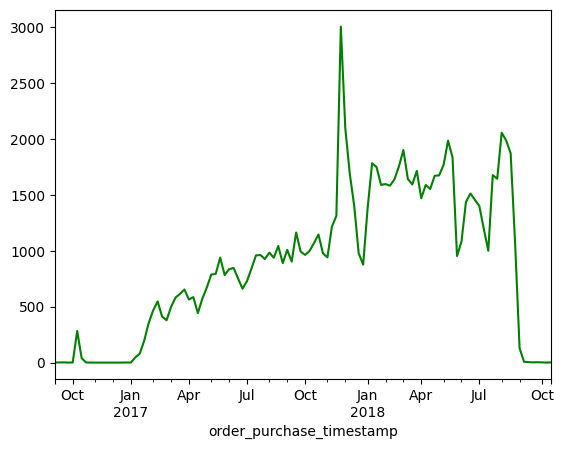

In [14]:
# Plot the weekly ---> "W"         weekly frequency / B         business day frequency
display(orders.resample('W').count())
display(orders.resample('W')['order_id'].count())
orders.resample('W')['order_id'].count().plot(color='g')


,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_purchase_timestamp,,,,,,,
2016-09-02,1,1,1,1,1,0,1
2016-09-05,1,1,1,1,0,0,1
2016-09-06,0,0,0,0,0,0,0
2016-09-07,0,0,0,0,0,0,0
2016-09-08,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
2018-10-11,0,0,0,0,0,0,0
2018-10-12,0,0,0,0,0,0,0
2018-10-15,0,0,0,0,0,0,0


order_purchase_timestamp
2016-09-02    1
2016-09-05    1
2016-09-06    0
2016-09-07    0
2016-09-08    0
             ..
2018-10-11    0
2018-10-12    0
2018-10-15    0
2018-10-16    1
2018-10-17    1
Freq: B, Name: order_id, Length: 554, dtype: int64

<AxesSubplot:xlabel='order_purchase_timestamp'>

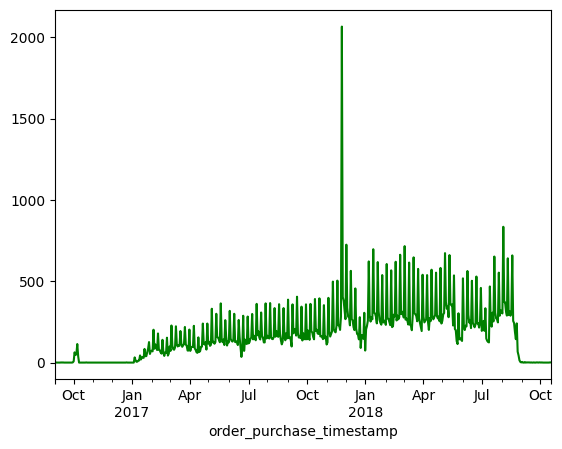

In [15]:
# Plot the weekly ---> "W"         weekly frequency / B         business day frequency
display(orders.resample('B').count())
display(orders.resample('B')['order_id'].count())
orders.resample('B')['order_id'].count().plot(color='g')


❓ Visualize the weekly number of non-delivered orders (to check for any potential issues)

<details>
    <summary><i>▸ Hint </i></summary>    
    
* Convert dates to Python `datetime` objects  
* You can use the built-in `pandas.Series.resample() tool from `pandas` to group your dataset by weeks
    
</details>

In [16]:
print(f"""
{display(orders.sort_index().head())}
{display(orders.sort_index().query("order_status != 'delivered'").head())}
{display(orders.sort_index().query("order_status != 'delivered'").loc['2017-02-01':,:"order_id"].resample('W').count())}
""")

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_purchase_timestamp,,,,,,,
2016-09-04 21:15:19,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00
2016-09-05 00:15:34,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-10-07 13:17:15,NaN,NaN,2016-10-28 00:00:00
2016-09-13 15:24:19,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-10-07 13:16:46,NaN,NaN,2016-09-30 00:00:00
2016-09-15 12:16:38,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
2016-10-02 22:07:52,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-06 15:50:56,NaN,NaN,2016-10-25 00:00:00


,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_purchase_timestamp,,,,,,,
2016-09-04 21:15:19,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-10-07 13:18:03,2016-10-18 13:14:51,NaN,2016-10-20 00:00:00
2016-09-05 00:15:34,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-10-07 13:17:15,NaN,NaN,2016-10-28 00:00:00
2016-09-13 15:24:19,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-10-07 13:16:46,NaN,NaN,2016-09-30 00:00:00
2016-10-02 22:07:52,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-06 15:50:56,NaN,NaN,2016-10-25 00:00:00
2016-10-03 21:01:41,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25 00:00:00


,order_id
order_purchase_timestamp,
2017-02-05,24
2017-02-12,37
2017-02-19,32
2017-02-26,30
2017-03-05,36
...,...
2018-09-23,2
2018-09-30,3
2018-10-07,2



None
None
None



Text(0.5, 1.0, 'weekly non-delivered orders')

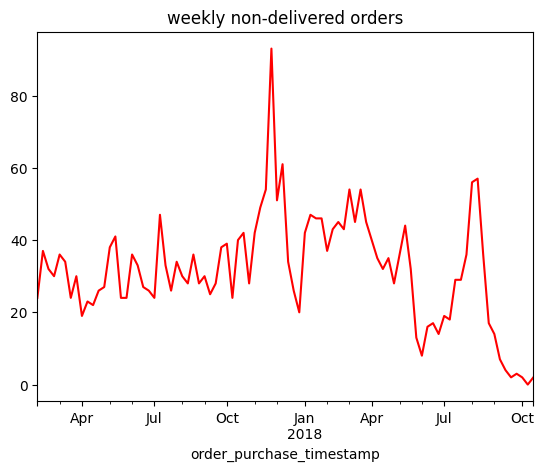

In [17]:
orders.sort_index().query("order_status != 'delivered'").loc['2017-02-01':].resample('W')['order_id'].count().plot(color='r')
plt.title('weekly non-delivered orders')

### Metric 1-bis (optional): Total payment values
❓ After plotting the total number of orders, we could also have a look at the weekly sum of `payment_value` in `BRL` to approximate Olist's weekly revenues.

In [18]:
data['order_payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [19]:
order_ids_payments = data['order_payments'].groupby('order_id').sum()[['payment_value']]
order_ids_payments.rename(columns={'payment_value': 'order_payment_value'}, inplace=True)
order_ids_payments.head()

,order_payment_value
order_id,
00010242fe8c5a6d1ba2dd792cb16214,72.19
00018f77f2f0320c557190d7a144bdd3,259.83
000229ec398224ef6ca0657da4fc703e,216.87
00024acbcdf0a6daa1e931b038114c75,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,218.04


💡 Merge the `payments` dataset with the `orders` dataset to collect the date of each payment.

In [20]:
print(f"""
{display(data['orders'].columns)}
{display(order_ids_payments.columns)}
""")
orders_payments = data['orders'].merge(order_ids_payments, on='order_id')

print(f"""
{display(orders_payments.head())}
{orders_payments.dtypes}
""")


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

Index(['order_payment_value'], dtype='object')


None
None



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,28.62



None
order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_payment_value              float64
dtype: object



⌛️ Once again, do not forget to handle datetimes properly

In [21]:
columns = list(orders_payments.columns)[3:8]
columns

for index,column in enumerate(columns):
    print(f"""
{index}: {column}
-------------------------------------
{orders_payments[columns].dtypes  = }
    """)
    orders_payments[column] = pd.to_datetime(orders_payments[column])
    print(f"""
{index}: {column}
-------------------------------------
{orders_payments[columns].dtypes  = }
    """)
    


0: order_purchase_timestamp
-------------------------------------
orders_payments[columns].dtypes  = order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object
    

0: order_purchase_timestamp
-------------------------------------
orders_payments[columns].dtypes  = order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object
    

1: order_approved_at
-------------------------------------
orders_payments[columns].dtypes  = order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date  

📈 Visualize the number of orders and total amount of payments per week

,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_payment_value
order_purchase_timestamp,,,,,,,,
2016-09-04,1,1,1,1,1,0,1,1
2016-09-11,1,1,1,1,0,0,1,1
2016-09-18,1,1,1,1,0,0,1,1
2016-09-25,0,0,0,0,0,0,0,0
2016-10-02,1,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...
2018-09-23,2,2,2,0,0,0,2,2
2018-09-30,3,3,3,0,0,0,3,3
2018-10-07,2,2,2,0,0,0,2,2


Text(0.5, 1.0, 'Weekly orders values')

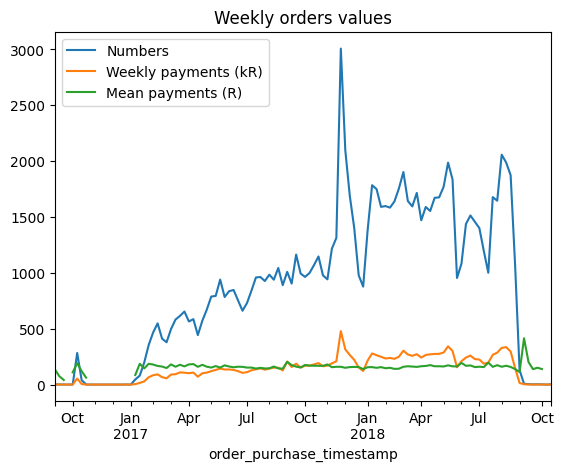

In [22]:
weekly_orders_payments = orders_payments.set_index('order_purchase_timestamp').resample('W')
display(weekly_orders_payments.count())
weekly_orders_payments.count()['order_id'].plot(label='Numbers')
weekly_orders_payments.sum()['order_payment_value'].apply(lambda x: x/1000).plot(label='Weekly payments (kR)')
weekly_orders_payments.mean()['order_payment_value'].plot(label = 'Mean payments (R)')
plt.legend()
plt.title('Weekly orders values')

📈 *(Optional)* Plot the weekly number of orders and payments again with techniques you learned during the `Data Visualization` module :)

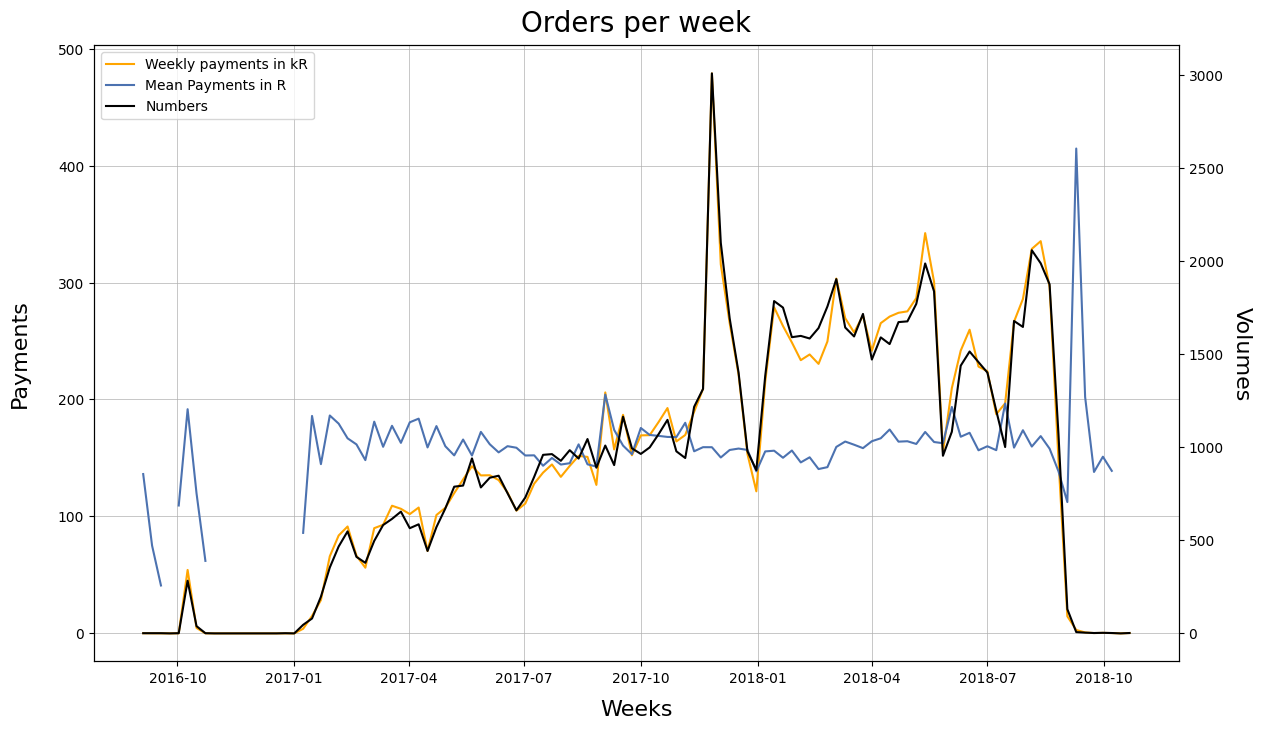

In [23]:
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(14,8))
    # getting axes
    ax1 = plt.gca()
    # duplicating the ax1
    ax2 = ax1.twinx()
    # Weekly payments and Mean Payments
    
    ax1.plot(weekly_orders_payments.sum()['order_payment_value'].apply(lambda x: x/1000),
             color="orange",
             label="Weekly payments in kR")
    ax1.plot(weekly_orders_payments.mean()['order_payment_value'],
             label="Mean Payments in R")
    ax1.set_xlabel("Weeks", 
                   fontsize = 16, 
                   labelpad = 10)
    ax1.set_ylabel("Payments", 
                   fontsize = 16, 
                   labelpad = 20)

    # Numbers
    ax2.plot(weekly_orders_payments.count()['order_id'],
             label="Numbers",
             c="black")
    ax2.set_ylabel("Volumes", 
                   fontsize = 16, 
                   rotation = 90*3, 
                   labelpad = 20)

    # Get a common legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    # Title
    ax1.set_title('Orders per week', 
                  fontsize = 20, 
                  pad = 10)

    # Grid
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)
    plt.show()

### Metric 2: Customer Satisfaction
❓ How does the `customer satisfaction` evolve on a monthly basis ? Use the mean average `review_score` to illustrate the customer satisfaction.

👉 Load the `reviews` :

In [24]:
reviews = data['order_reviews'].copy()
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


⌛️ If you need to handle datetime, do it.

In [25]:
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews.set_index('review_creation_date', inplace=True)

📉 Plot the customer satisfaction evolution over time

<AxesSubplot:xlabel='review_creation_date'>

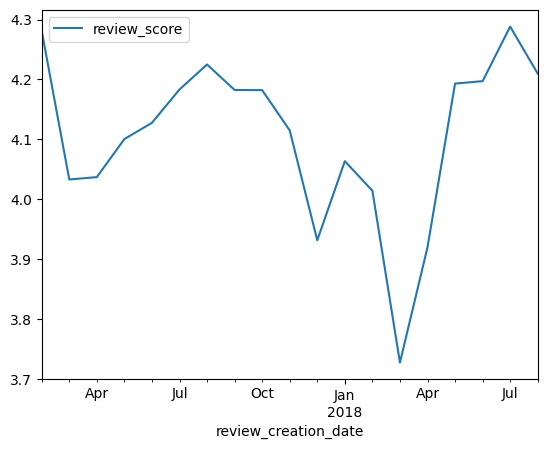

In [26]:
reviews.loc['2017-02-01':].resample('M').agg({'review_score':'mean'}).plot()

📉 *(Optional)* Plot the customer satisfaction evolution over time again with techniques you learned during the Data Visualization module :)

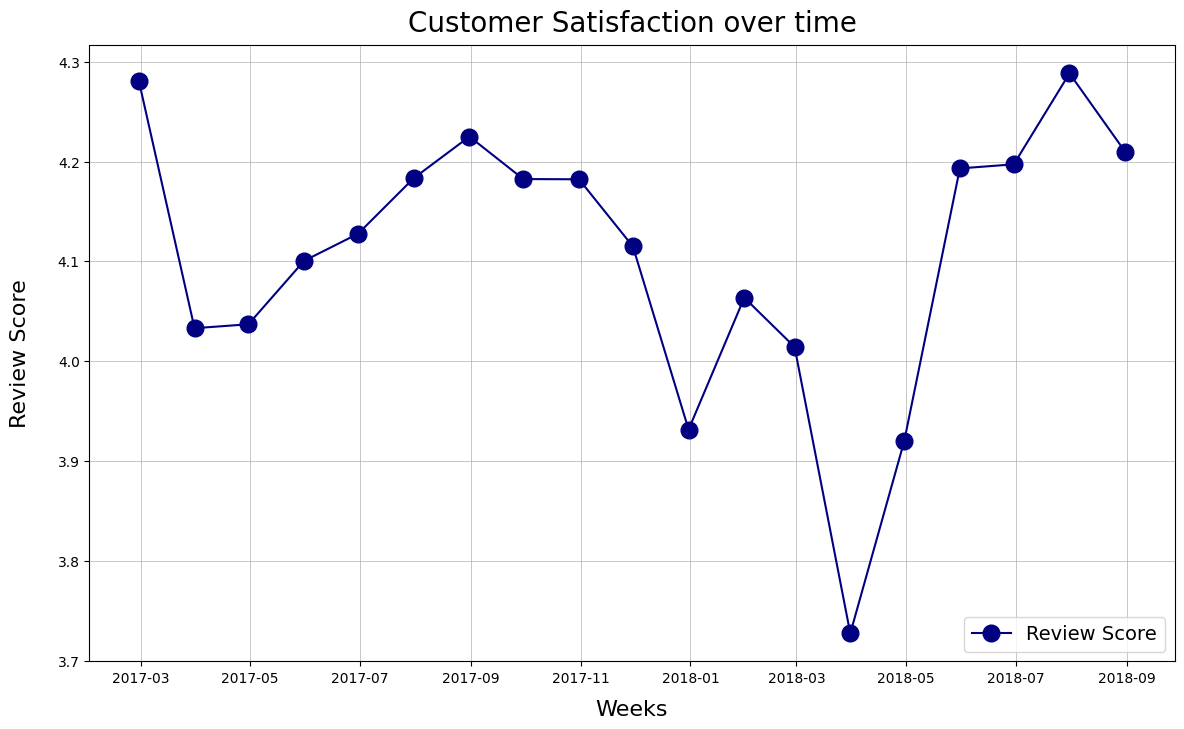

In [27]:
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(14,8))
    # getting axes
    ax = plt.gca()
    # Customer Satisfaction over time
    
    ax.plot(reviews.loc['2017-02-01':].resample('M').agg({'review_score':'mean'}),
            color = "#000080", 
            marker = "o", 
            markersize = 12,
            label="Review Score")
    ax.set_xlabel("Weeks", fontsize = 16, labelpad = 10)
    ax.set_ylabel("Review Score", fontsize = 16, labelpad = 20)

    # Get a  legend
    ax.legend(loc='lower right', fontsize = 14)

    # Title
    ax.set_title('Customer Satisfaction over time', fontsize = 20, pad = 10)

    # Grid
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    plt.show()

### Metric 3: Shipping delay

❓Create two new metrics, `delay_vs_expected` and `wait_time` in ***days***, from the `orders` dataset, and plot their historical evolution on a weekly basis to detect trends

<details>
    <summary>▸ <i>Hint</i></summary>

    
Ask `StackOverflow` to help you compute differences between `datetime`s in Python!
</details>

🛒 Let's focus on delivered orders so that we can compute the shipping delays:

In [34]:
orders = orders.query("order_status=='delivered'").reset_index()
orders

,order_purchase_timestamp,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,2016-09-15 12:16:38,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00
1,2016-10-03 09:44:50,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27 00:00:00
2,2016-10-03 16:56:50,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07 00:00:00
3,2016-10-03 21:13:36,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29 00:00:00
4,2016-10-03 22:06:03,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23 00:00:00
...,...,...,...,...,...,...,...,...
96473,2018-08-29 12:25:59,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30 22:48:27,2018-09-03 00:00:00
96474,2018-08-29 14:18:23,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04 00:00:00
96475,2018-08-29 14:18:28,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11 00:00:00
96476,2018-08-29 14:52:00,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03 00:00:00


⌛️ Datetime problems again ? Fix them ;)

In [35]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [37]:
orders.dtypes

order_purchase_timestamp         datetime64[ns]
order_id                                 object
customer_id                              object
order_status                             object
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

👉 Compute the delay between the actual delivery date and the ETA for each order.

In [40]:
orders['delay_vs_expected'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']) / np.timedelta64(24, 'h')

In [41]:
orders

,order_purchase_timestamp,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_vs_expected
0,2016-09-15 12:16:38,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,36.324745
1,2016-10-03 09:44:50,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,-0.415127
2,2016-10-03 16:56:50,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,-10.236366
3,2016-10-03 21:13:36,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29,-25.542975
4,2016-10-03 22:06:03,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23,-22.536319
...,...,...,...,...,...,...,...,...,...
96473,2018-08-29 12:25:59,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30 22:48:27,2018-09-03,-3.049688
96474,2018-08-29 14:18:23,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,-4.316030
96475,2018-08-29 14:18:28,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11,-11.296863
96476,2018-08-29 14:52:00,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03,-3.307650


👉 Compute the waiting time between the actual delivery date and the moment a customer ordered their items

In [42]:
orders['wait_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']) / np.timedelta64(24, 'h')

In [43]:
orders

,order_purchase_timestamp,order_id,customer_id,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_vs_expected,wait_time
0,2016-09-15 12:16:38,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,36.324745,54.813194
1,2016-10-03 09:44:50,3b697a20d9e427646d92567910af6d57,355077684019f7f60a031656bd7262b8,delivered,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,-0.415127,23.178738
2,2016-10-03 16:56:50,be5bc2f0da14d8071e2d45451ad119d9,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,-10.236366,24.057500
3,2016-10-03 21:13:36,a41c8759fbe7aab36ea07e038b2d4465,6f989332712d3222b6571b1cf5b835ce,delivered,2016-10-05 03:11:49,2016-10-25 11:57:59,2016-11-03 10:58:07,2016-11-29,-25.542975,30.572581
4,2016-10-03 22:06:03,d207cc272675637bfed0062edffd0818,b8cf418e97ae795672d326288dfab7a7,delivered,2016-10-04 10:28:07,2016-10-21 14:23:37,2016-10-31 11:07:42,2016-11-23,-22.536319,27.542813
...,...,...,...,...,...,...,...,...,...,...
96473,2018-08-29 12:25:59,52018484704db3661b98ce838612b507,e450a297a7bc6839ceb0cf1a2377fa02,delivered,2018-08-29 12:35:17,2018-08-29 13:38:00,2018-08-30 22:48:27,2018-09-03,-3.049688,1.432269
96474,2018-08-29 14:18:23,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,-4.316030,1.087870
96475,2018-08-29 14:18:28,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,delivered,2018-08-29 14:30:23,2018-08-29 18:51:00,2018-08-30 16:52:31,2018-09-11,-11.296863,1.106979
96476,2018-08-29 14:52:00,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,delivered,2018-08-29 15:05:22,2018-08-29 20:01:00,2018-08-30 16:36:59,2018-09-03,-3.307650,1.072905


⌛️ How many orders were delivered later than expected ? <br/>
*You can also give an answer in terms of percentage if you prefer.*
<details>
    <summary><i>▸ Hint </i></summary>

    
You can create a `boolean_feature` which is :
* True when actual_delivered_date > ETA $\leftrightarrow$ actual_delivered_date - ETA > 0
* False otherwise
    
</details>




In [44]:
# create a boolean feature that says whether an order was delivered with a delay or not
# delay_vs_expected > 0 
# <=> actual_delivered date > ETA 
# <=> actual_delivered date - ETA > 0

orders["was_late"] = orders['delay_vs_expected'].map(lambda x: x > 0)

# early_or_in_time is just a nice column but it's redundant with the was_late
orders["early_or_on_time"] = orders["was_late"].map({True:"late",False:"in_time"})

In [58]:
total = orders["early_or_on_time"].value_counts().sum()

in_time = orders["early_or_on_time"].value_counts()[0]
late = orders["early_or_on_time"].value_counts()[1]

print(f"""
{total = }
{in_time = }
{late = }
{round(late / total * 100,2) = }
""")


total = 96478
in_time = 88652
late = 7826
round(late / total * 100,2) = 8.11



In [59]:
round(orders["early_or_on_time"].value_counts(normalize = True),2)

in_time    0.92
late       0.08
Name: early_or_on_time, dtype: float64

* On average, 8% of the orders are delivered after the ETA ⌛️

* Let's find which weeks were the worst 👇
    1. Aggregate the dataset per week
    2. Compute the percentage of orders delivered lately each week

In [61]:
delay_analysis_per_week = orders.set_index('order_purchase_timestamp').resample('W').agg({
    'delay_vs_expected':np.mean,
    'wait_time':np.mean,
    'was_late':np.sum,
    'order_id':'count'})

delay_analysis_per_week.columns = ['avg_delay_vs_exp', 'avg_wait_time','nb_of_delays', 'nb_of_orders']

delay_analysis_per_week['pct_of_lateness'] = delay_analysis_per_week['nb_of_delays'] / delay_analysis_per_week['nb_of_orders']

print("-"*40)
print("Delay Analysis per week")
print("-"*40)
display(round(delay_analysis_per_week.tail(10),2))

----------------------------------------
Delay Analysis per week
----------------------------------------


,avg_delay_vs_exp,avg_wait_time,nb_of_delays,nb_of_orders,pct_of_lateness
order_purchase_timestamp,,,,,
2018-07-01,-16.78,8.33,10,1382,0.01
2018-07-08,-13.84,8.52,19,1178,0.02
2018-07-15,-9.88,11.27,59,972,0.06
2018-07-22,-10.40,9.03,65,1649,0.04
2018-07-29,-9.92,8.32,63,1610,0.04
2018-08-05,-6.57,8.66,276,2002,0.14
2018-08-12,-7.01,8.49,243,1931,0.13
2018-08-19,-8.52,7.63,133,1839,0.07
2018-08-26,-8.32,5.48,71,1054,0.07


📈 Plot the `number of delays` and `percentage of delayed orders` per week

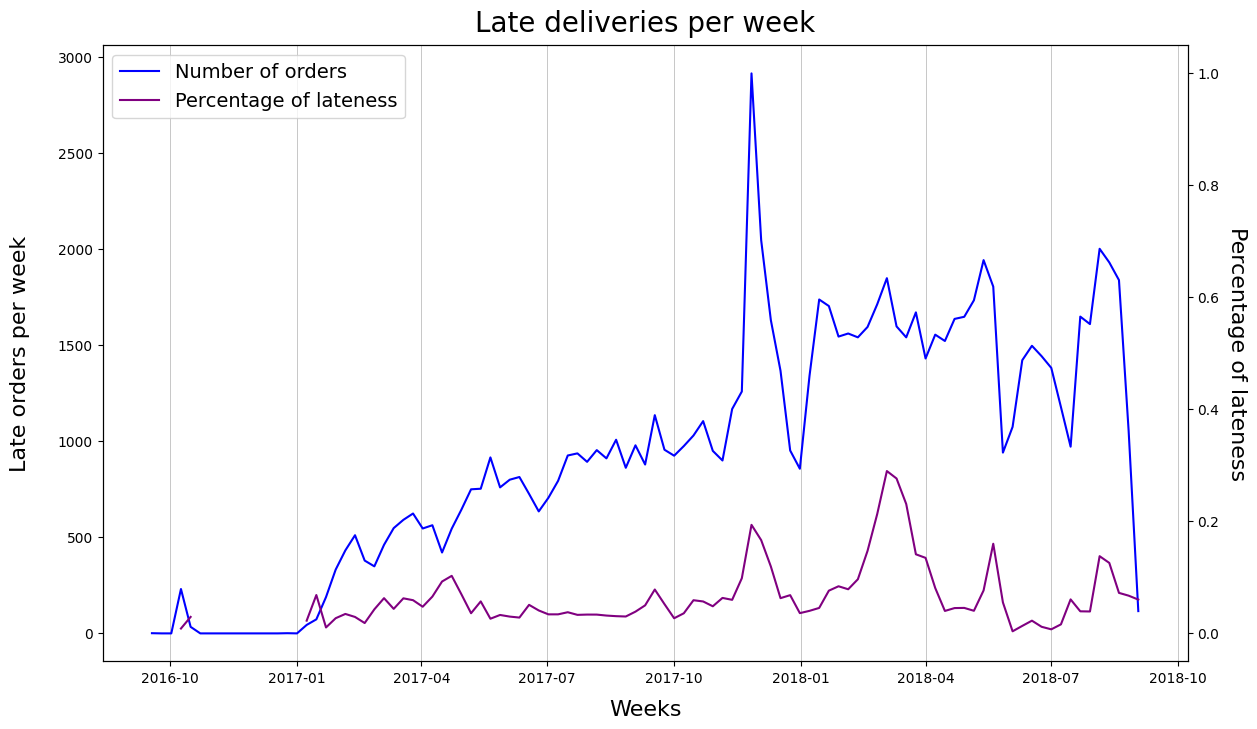

In [62]:
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(14,8))
    # getting axes
    ax1 = plt.gca()
    # duplicating the ax1
    ax2 = ax1.twinx()
    # Weekly payments and Mean Payments
    
    ax1.plot(delay_analysis_per_week['nb_of_orders'],
             color="blue",
             label="Number of orders")
    ax1.set_xlabel("Weeks", 
                   fontsize = 16, 
                   labelpad = 10)
    ax1.set_ylabel("Late orders per week", 
                   fontsize = 16, 
                   labelpad = 20)

    # Numbers
    ax2.plot(delay_analysis_per_week['pct_of_lateness'],
             label="Percentage of lateness",
             c="purple")
    ax2.set_ylabel("Percentage of lateness", 
                   fontsize = 16, 
                   rotation = 90*3, 
                   labelpad = 20)

    # Get a conjoined legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left', fontsize = 14)

    # Title
    ax1.set_title('Late deliveries per week', 
                  fontsize = 20, 
                  pad = 10)
    
    # Vertical lines
    #ax1.xvlines(x="2018-03-04")

    # Grid
    ax1.grid(axis="x",linewidth=0.5)
    plt.show()

#### Delay Analysis

📈 📉 From the previous graph, Olist experienced major lateness issues on 3-4 weeks ⚠️...

👉 Let's deep dive into these peaks of lateness.

❓ Create a dataframe (with weeks as indexes ) with the following columns:
* number of delays
* number of orders
* percentage of delayed orders

In [63]:
round(delay_analysis_per_week[['nb_of_delays', 'nb_of_orders','pct_of_lateness']].sort_values(by = 'pct_of_lateness', ascending = False).head(10),2)

,nb_of_delays,nb_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2016-09-18,1,1,1.00
2018-03-04,536,1849,0.29
2018-03-11,442,1598,0.28
2018-03-18,356,1541,0.23
2018-02-25,365,1713,0.21
2017-11-26,565,2915,0.19
2017-12-03,341,2047,0.17
2018-05-20,289,1805,0.16
2018-02-18,235,1595,0.15


❓ Create sub-dataframes to seperate these weeks into subgroups.

A suggestion:
- 20% and more
- 15-20%
- 10-15%
- 5-10%
- 5% and less

In [64]:
lateness_20_and_more = delay_analysis_per_week.query("pct_of_lateness >= 0.20")
display(round(lateness_20_and_more[1:][['nb_of_delays', 'nb_of_orders','pct_of_lateness']],2))

,nb_of_delays,nb_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2018-02-25,365,1713,0.21
2018-03-04,536,1849,0.29
2018-03-11,442,1598,0.28
2018-03-18,356,1541,0.23


In [65]:
lateness_15_20 = delay_analysis_per_week[delay_analysis_per_week["pct_of_lateness"].between(0.15,0.20)]
display(round(lateness_15_20[['nb_of_delays', 'nb_of_orders','pct_of_lateness']],2))

,nb_of_delays,nb_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2017-11-26,565,2915,0.19
2017-12-03,341,2047,0.17
2018-05-20,289,1805,0.16


In [66]:
lateness_10_15 = delay_analysis_per_week[delay_analysis_per_week["pct_of_lateness"].between(0.10,0.15)]
display(round(lateness_10_15[['nb_of_delays', 'nb_of_orders','pct_of_lateness']],2))

,nb_of_delays,nb_of_orders,pct_of_lateness
order_purchase_timestamp,,,
2017-04-23,56,545,0.10
2017-12-10,195,1631,0.12
2018-02-18,235,1595,0.15
2018-03-25,236,1671,0.14
2018-04-01,193,1431,0.13
2018-08-05,276,2002,0.14
2018-08-12,243,1931,0.13


In [67]:
lateness_05_10 = delay_analysis_per_week[delay_analysis_per_week["pct_of_lateness"].between(0.05,0.10)]

In [68]:
lateness_05_and_less = delay_analysis_per_week[delay_analysis_per_week["pct_of_lateness"].between(0.00,0.05)]

In [69]:
lateness_brackets = pd.Series([
    " ≥ 20%",
    "15% - 20%",
    "10% - 15%",
    "5% - 10%",
    " ≤ 5%"
])

lateness_numbers = pd.Series([
    lateness_20_and_more.shape[0]-1,
    lateness_15_20.shape[0],
    lateness_10_15.shape[0],
    lateness_05_10.shape[0],
    lateness_05_and_less.shape[0]
    
])

lateness_df = pd.concat([lateness_brackets,lateness_numbers],axis = 1)
lateness_df.columns = ['brackets', 'nb_weeks']

display(lateness_df)

,brackets,nb_weeks
0,≥ 20%,4
1,15% - 20%,3
2,10% - 15%,7
3,5% - 10%,30
4,≤ 5%,46
